## CNN-Keras_res1

In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Using TensorFlow backend.


11493376/11490434 [==============================] - 1s 0us/step


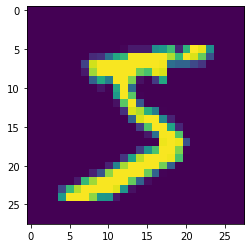

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [0]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64,kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32,kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [13]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/5





60000/60000 [==============================] - 14s 236us/step - loss: 6.7579 - acc: 0.5642 - val_loss: 0.1346 - val_acc: 0.9612
Epoch 2/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0867 - acc: 0.9741 - val_loss: 0.0760 - val_acc: 0.9755
Epoch 3/5
60000/60000 [==============================] - 7s 124us/step - loss: 0.0593 - acc: 0.9815 - val_loss: 0.0629 - val_acc: 0.9820
Epoch 4/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0505 - acc: 0.9848 - val_loss: 0.0601 - val_acc: 0.9832
Epoch 5/5
60000/60000 [==============================] - 7s 122us/step - loss: 0.0424 - acc: 0.9871 - val_loss: 0.1094 - val_acc: 0.9742


In [15]:
#predict first 4 images in the test set
model.predict(X_test[:4])

array([[4.6905299e-11, 5.1584787e-12, 6.2967409e-08, 8.8422860e-09,
        1.0802307e-12, 9.0454673e-13, 4.4116652e-16, 9.9999988e-01,
        3.8913055e-09, 6.0492650e-10],
       [4.7445161e-07, 1.8088731e-08, 9.9999952e-01, 1.1688795e-11,
        5.5659984e-11, 8.7602397e-14, 3.2126692e-08, 1.0289248e-15,
        2.4189797e-08, 3.7960446e-14],
       [4.4702006e-08, 9.9937159e-01, 4.9554814e-09, 2.2158556e-10,
        5.8992219e-04, 4.5963446e-08, 1.2782860e-06, 8.6229491e-08,
        3.6951718e-05, 5.8710832e-08],
       [1.0000000e+00, 4.8898288e-13, 7.9362761e-10, 6.5631839e-18,
        5.4775108e-12, 1.0476959e-10, 3.3098596e-10, 3.4479264e-13,
        2.6752591e-09, 1.0729909e-11]], dtype=float32)

In [0]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [16]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                8010      
Total params: 27,114
Trainable params: 27,114
Non-trainable params: 0
__________________________________________________